<a href="https://colab.research.google.com/github/jp0utside/Math-152/blob/main/Random_Walk_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ideas


*   Have random walks using circular coordinates, lines can either go along the circumference of the circle or travel inward toward the radius (matplotlib)
*   Have program start in upper left and create rule for how x and y are determined (probably generating a 6 coefficents for x and y, and then creating equations for how the image will change as the coordinates do)




In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
def circle_walk(n = 360, t = 100):
  rads = np.linspace(0, 2*np.pi, n)
  walks = np.zeros((2, n, t))
  walks[:, :, 0] = (np.cos(rads), np.sin(rads))
  rad_step = 1/n
  deg_step = (2*np.pi)/n
  for i in range(1, t):
    for j in range(n):
      sign = np.random.choice([-1, 1])
      dim = np.random.choice([rad_step, deg_step])
      walks[0,j,i] = walks[0,j,i-1] + sign*(np.cos(dim))
      walks[1,j,i] = walks[1,j,i-1] + sign*(np.sin(dim))
  return walks
  #walks = np.vstack((np.cos(rads), np.sin(rads))).T
  #walks.reshape()
    
walks = circle_walk()

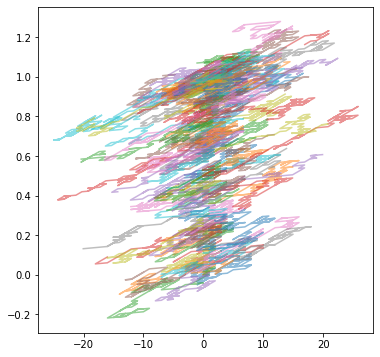

[[ 1.00000000e+00  1.52304844e-04 -9.99843837e-01]
 [ 0.00000000e+00 -1.74524064e-02 -2.02301806e-02]]


In [16]:
plt.figure(figsize=(6,6))
#plt.scatter(walks[0,:,3], walks[1,:,3], s = 6)
for i in range(walks.shape[2]):
  plt.plot(walks[0,i,:], walks[1,i,:], alpha = 0.5)
plt.show()
print(walks[:,0,:3])

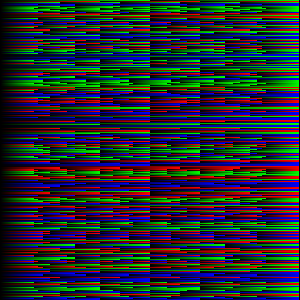

In [58]:
def rand_color():
  xlist = np.linspace(0, 255, 300)
  pixels = np.zeros((xlist.shape[0], xlist.shape[0], 3))
  for i in range(300):
    co = np.random.randint(1,10)
    chan = np.random.choice([0,1,2])
    for j in range(300):
      pixels[i, j, chan] = co*xlist[j] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))

rand_color()

# pixels[:,:,0] = np.add.outer(xlist*np.random.randint(1, 10), ylist*np.random.randint(1,10))%255
# pixels[:,:,1] = np.add.outer(xlist*np.random.randint(1, 10), ylist*np.random.randint(1,10))%255
# pixels[:,:,2] = np.add.outer(xlist*np.random.randint(1, 10), ylist*np.random.randint(1,10))%255
#display(Image.fromarray(pixels.astype(np.uint8)))

In [ ]:
def rand_grad(s = 300):
  corners = np.random.randint(0, 255, size=(4,3))
  xlist = np.linspace(0, 255, 300)
  pixels = np.zeros((s, s, 3))
  for i in range(s):
    co = np.random.randint(1,10)
    chan = np.random.choice([0,1,2])
    for j in range(s):
      pixels[i, j, chan] = co*xlist[j] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))

With this random walk, you essentially create random waves. You start by determining the number of waves by taking an even distribution of numbers between 0 and 255, then multiplying it by the number of waves you want then taking the resulting array mod 255. Then, you determine color gradient coefficients by taking random numbers between 1 and 10. Then, to generate the resulting image, you set the first row of pixels to the initial wave array, then with each row you get the red green and blue values by adding the previous row and the color coefficient. 

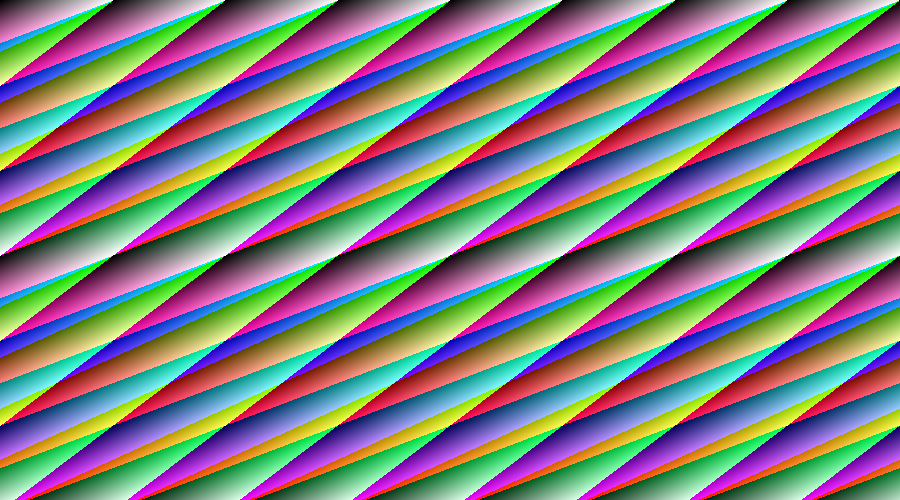

In [369]:

def hex_waves(width = 300, height = 300):
  xlist = np.linspace(0, 255, width)*np.random.randint(1,10) % 255
  pixels = np.zeros((height, width, 3))
  coeffs = np.random.randint(1, 10, size=3)
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = coeffs[0]+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = coeffs[1]+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = coeffs[2]+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
hex_waves(900, 500)

This random walk is similar to the previous one, but instead increments by a random number each time. This makes the ultimate image non linear as the colors change by a different amount each time. As you can see, the farther from the initial array you get, the less in sync the waves become, adding in a nice amount of randomness. The variables w and r set the number of waves and the degree of potential change from row to row.


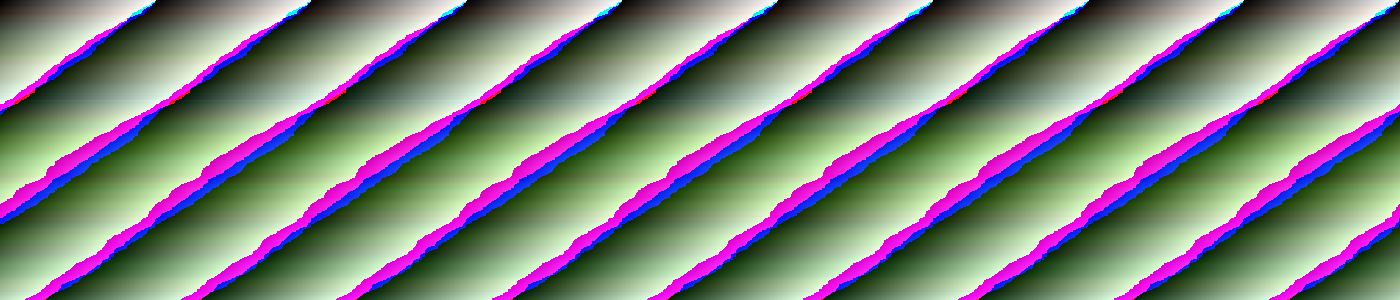

In [418]:
def rand_waves(width = 300, height = 300, w = 5, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = np.random.randint(0, r)+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = np.random.randint(0, r)+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = np.random.randint(0, r)+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
rand_waves(1400, 300, 9, 6)

This random walk does the same as the previous, but allows for the colors to move both up and down. This creates an even more random image with much less linear waves

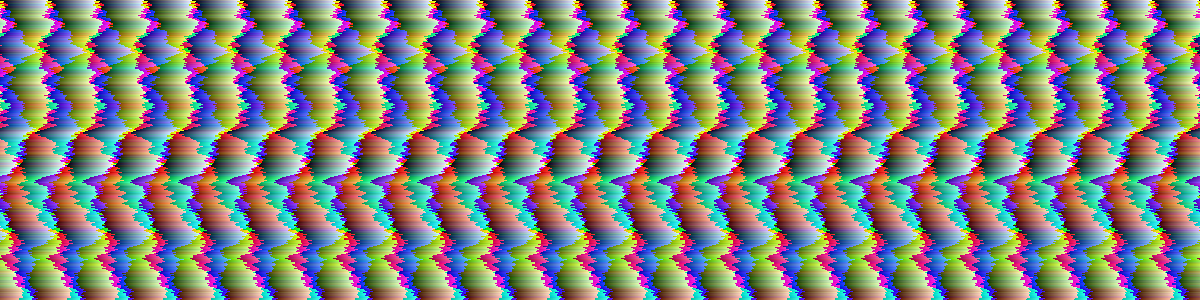

In [431]:
def osc_rand_waves(width = 300, height = 300, w = 5, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  coeffs = np.random.randint(1, 10, size=3)
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = np.random.randint(-r, r)+pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = np.random.randint(-r, r)+pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = np.random.randint(-r, r)+pixels[i-1, :, 2] % 255
  display(Image.fromarray(pixels.astype(np.uint8)))
osc_rand_waves(1200, 300, 25, 25)

This random walk follows a similar pattern to the previous few, but in this case the rgb colors are changed using multiplication instead of addition or subtraction. This is important because it means that the number of waves are being changed each time. It creates a seemingly random image, but if you look closely you can see how each row has a different number of "waves" in it.

[1.00165951 1.46807913 1.33968992]


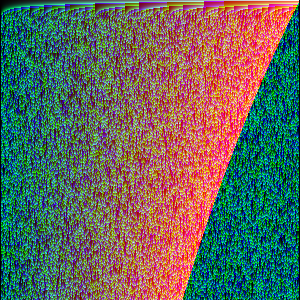

In [382]:
def hex_ocean(width = 300, height = 300, w = 4, r = 10):
  xlist = np.linspace(0, 255, width)*w % 255
  pixels = np.zeros((height, width, 3))
  coeffs = np.random.rand(3)*r
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = coeffs[0]*pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = coeffs[1]*pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = coeffs[2]*pixels[i-1, :, 2] % 255
  print(coeffs)
  display(Image.fromarray(pixels.astype(np.uint8)))
hex_ocean(300, 300, 1, 2)

This random walk takes the same approach, but instead of starting with a wave and multiplying it, it starts with the range of values between 0 and 1 (i.e. black). Then it chooses a number between 1 and 2 to be the coefficient for red, green, and blue values. Then, depending on the magnitude of the coefficient, as the rows continue you can see the waves start to form then multiply.

[1.32337428 1.1801499  1.79610472]


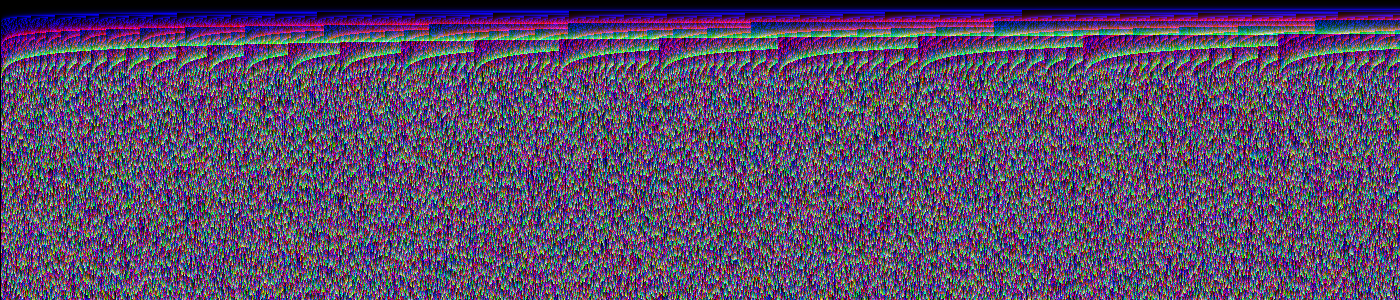

In [435]:
def hex_ocean(width = 300, height = 300, w = 4, r = 10):
  xlist = np.linspace(0, 1, width)
  pixels = np.zeros((height, width, 3))
  coeffs = (np.random.rand(3) + 1)
  pixels[0,:,0] = xlist
  pixels[0,:,1] = xlist
  pixels[0,:,2] = xlist
  for i in range(1, height):
    pixels[i, :, 0] = coeffs[0]*pixels[i-1, :, 0] % 255
    pixels[i, :, 1] = coeffs[1]*pixels[i-1, :, 1] % 255
    pixels[i, :, 2] = coeffs[2]*pixels[i-1, :, 2] % 255
  print(coeffs)
  display(Image.fromarray(pixels.astype(np.uint8)))
hex_ocean(1400, 300, 1, 2)

In [ ]:
""